In [1]:
import pandas as pd
import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'

In [3]:
url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class={};page={};result=1;result=2;result=3;result=5;spanmin1=16+Jul+2019;spanval1=span;template=results;type={}'

In [4]:
def scrap_data(formatt, style, n_pages):
    data = []
    for page in tqdm.tqdm(range(1, n_pages)):
        new_url = url.format(formatt, page, style)
        df = pd.read_html(new_url)[2]
        data.append(df)
    data_ = pd.concat(data)
    return data_

In [5]:
odi_batting_data = scrap_data(2, 'batting', 10)
odi_batting_data.to_csv('../data/odi_batting_data_after_wc.csv')
print('1/2 done...')
odi_bowling_data = scrap_data(2, 'bowling', 10)
odi_bowling_data.to_csv('../data/odi_bowling_data_after_wc.csv')
print('2/2 done...')

100%|██████████| 9/9 [00:13<00:00,  1.54s/it]


1/2 done...


100%|██████████| 9/9 [00:13<00:00,  1.54s/it]

2/2 done...


In [6]:
batting_data = pd.read_csv('../data/odi_batting_data_after_wc.csv')
batting_data = batting_data.drop(columns=['Unnamed: 0', 'Unnamed: 15'])
# batting_data = batting_data[['Player', 'Runs', 'Ave', 'SR', '50', '100', '4s', '6s']]
batting_data.dropna(inplace=True)
batting_data.replace('-', '0', inplace=True)
batting_data['HS'] = batting_data['HS'].str.replace('*', '')
batting_data.iloc[:, 2:] = batting_data.iloc[:, 2:].astype(float)
batting_data.iloc[:, 2:7] = batting_data.iloc[:, 2:7].astype(float).astype(int)
batting_data.iloc[:, 10:] = batting_data.iloc[:, 10:].astype(float).astype(int)
batting_data

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,SD Hope (WI),2019-2022,25,25,4,1212,115,57.71,1665.0,72.79,4,7,0,109,11
1,V Kohli (INDIA),2019-2022,23,22,1,1025,120,48.80,1112.0,92.17,2,10,2,96,7
2,PR Stirling (IRE),2020-2022,22,22,1,1009,142,48.04,1213.0,83.18,4,3,0,99,26
3,KL Rahul (INDIA),2019-2022,19,19,2,930,112,54.70,954.0,97.48,3,6,0,67,28
4,Aqib Ilyas (OMA),2019-2021,16,15,2,801,109,61.61,993.0,80.66,2,5,0,77,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Ibrahim Zadran (AFG),2019-2019,1,1,0,2,2,2.00,9.0,22.22,0,0,0,0,0
446,D Lakshan (SL),2021-2021,1,1,0,2,2,2.00,9.0,22.22,0,0,0,0,0
447,M Prasidh Krishna (INDIA),2021-2022,6,3,2,2,2,2.00,9.0,22.22,0,0,1,0,0
448,C Viljoen (NAM),2019-2019,1,1,0,2,2,2.00,12.0,16.66,0,0,0,0,0


In [7]:
d = batting_data[batting_data['Player'].str.contains('IND')]
d = d[d['Runs'] > 0]
d

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
1,V Kohli (INDIA),2019-2022,23,22,1,1025,120,48.80,1112.0,92.17,2,10,2,96,7
3,KL Rahul (INDIA),2019-2022,19,19,2,930,112,54.70,954.0,97.48,3,6,0,67,28
6,S Dhawan (INDIA),2019-2022,18,16,1,794,98,52.93,874.0,90.84,0,8,0,100,6
15,SS Iyer (INDIA),2019-2022,19,18,1,657,103,38.64,657.0,100.00,1,6,0,62,14
19,RG Sharma (INDIA),2019-2022,14,13,0,612,159,47.07,647.0,94.59,2,2,0,76,13
38,RR Pant (INDIA),2019-2022,14,13,0,450,85,34.61,399.0,112.78,0,4,2,39,19
66,HH Pandya (INDIA),2020-2021,9,8,1,329,92,47.00,272.0,120.95,0,3,1,24,14
77,RA Jadeja (INDIA),2019-2020,15,11,6,299,66,59.80,294.0,101.70,0,2,0,19,8
95,SA Yadav (INDIA),2021-2022,6,6,2,261,64,65.25,252.0,103.57,0,2,0,32,1
131,PP Shaw (INDIA),2020-2021,6,6,0,189,49,31.50,166.0,113.85,0,0,0,32,2


In [8]:
d = d[['Player', 'Runs', 'Ave', 'SR']]
d1 = d.iloc[:9, :]
d2 = d.iloc[9:, :]
d1.loc[len(d1.index)] = ['Others ', d2.Runs.sum(), round(d2.Ave.mean(), 3), round(d2.SR.mean(), 3)]
d1['Player'] = d1['Player'].str.replace('\(INDIA\)', '')
d1

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Player,Runs,Ave,SR
1,V Kohli,1025,48.800,92.170
3,KL Rahul,930,54.700,97.480
6,S Dhawan,794,52.930,90.840
15,SS Iyer,657,38.640,100.000
19,RG Sharma,612,47.070,94.590
38,RR Pant,450,34.610,112.780
66,HH Pandya,329,47.000,120.950
77,RA Jadeja,299,59.800,101.700
95,SA Yadav,261,65.250,103.570
9,Others,1550,26.774,82.665


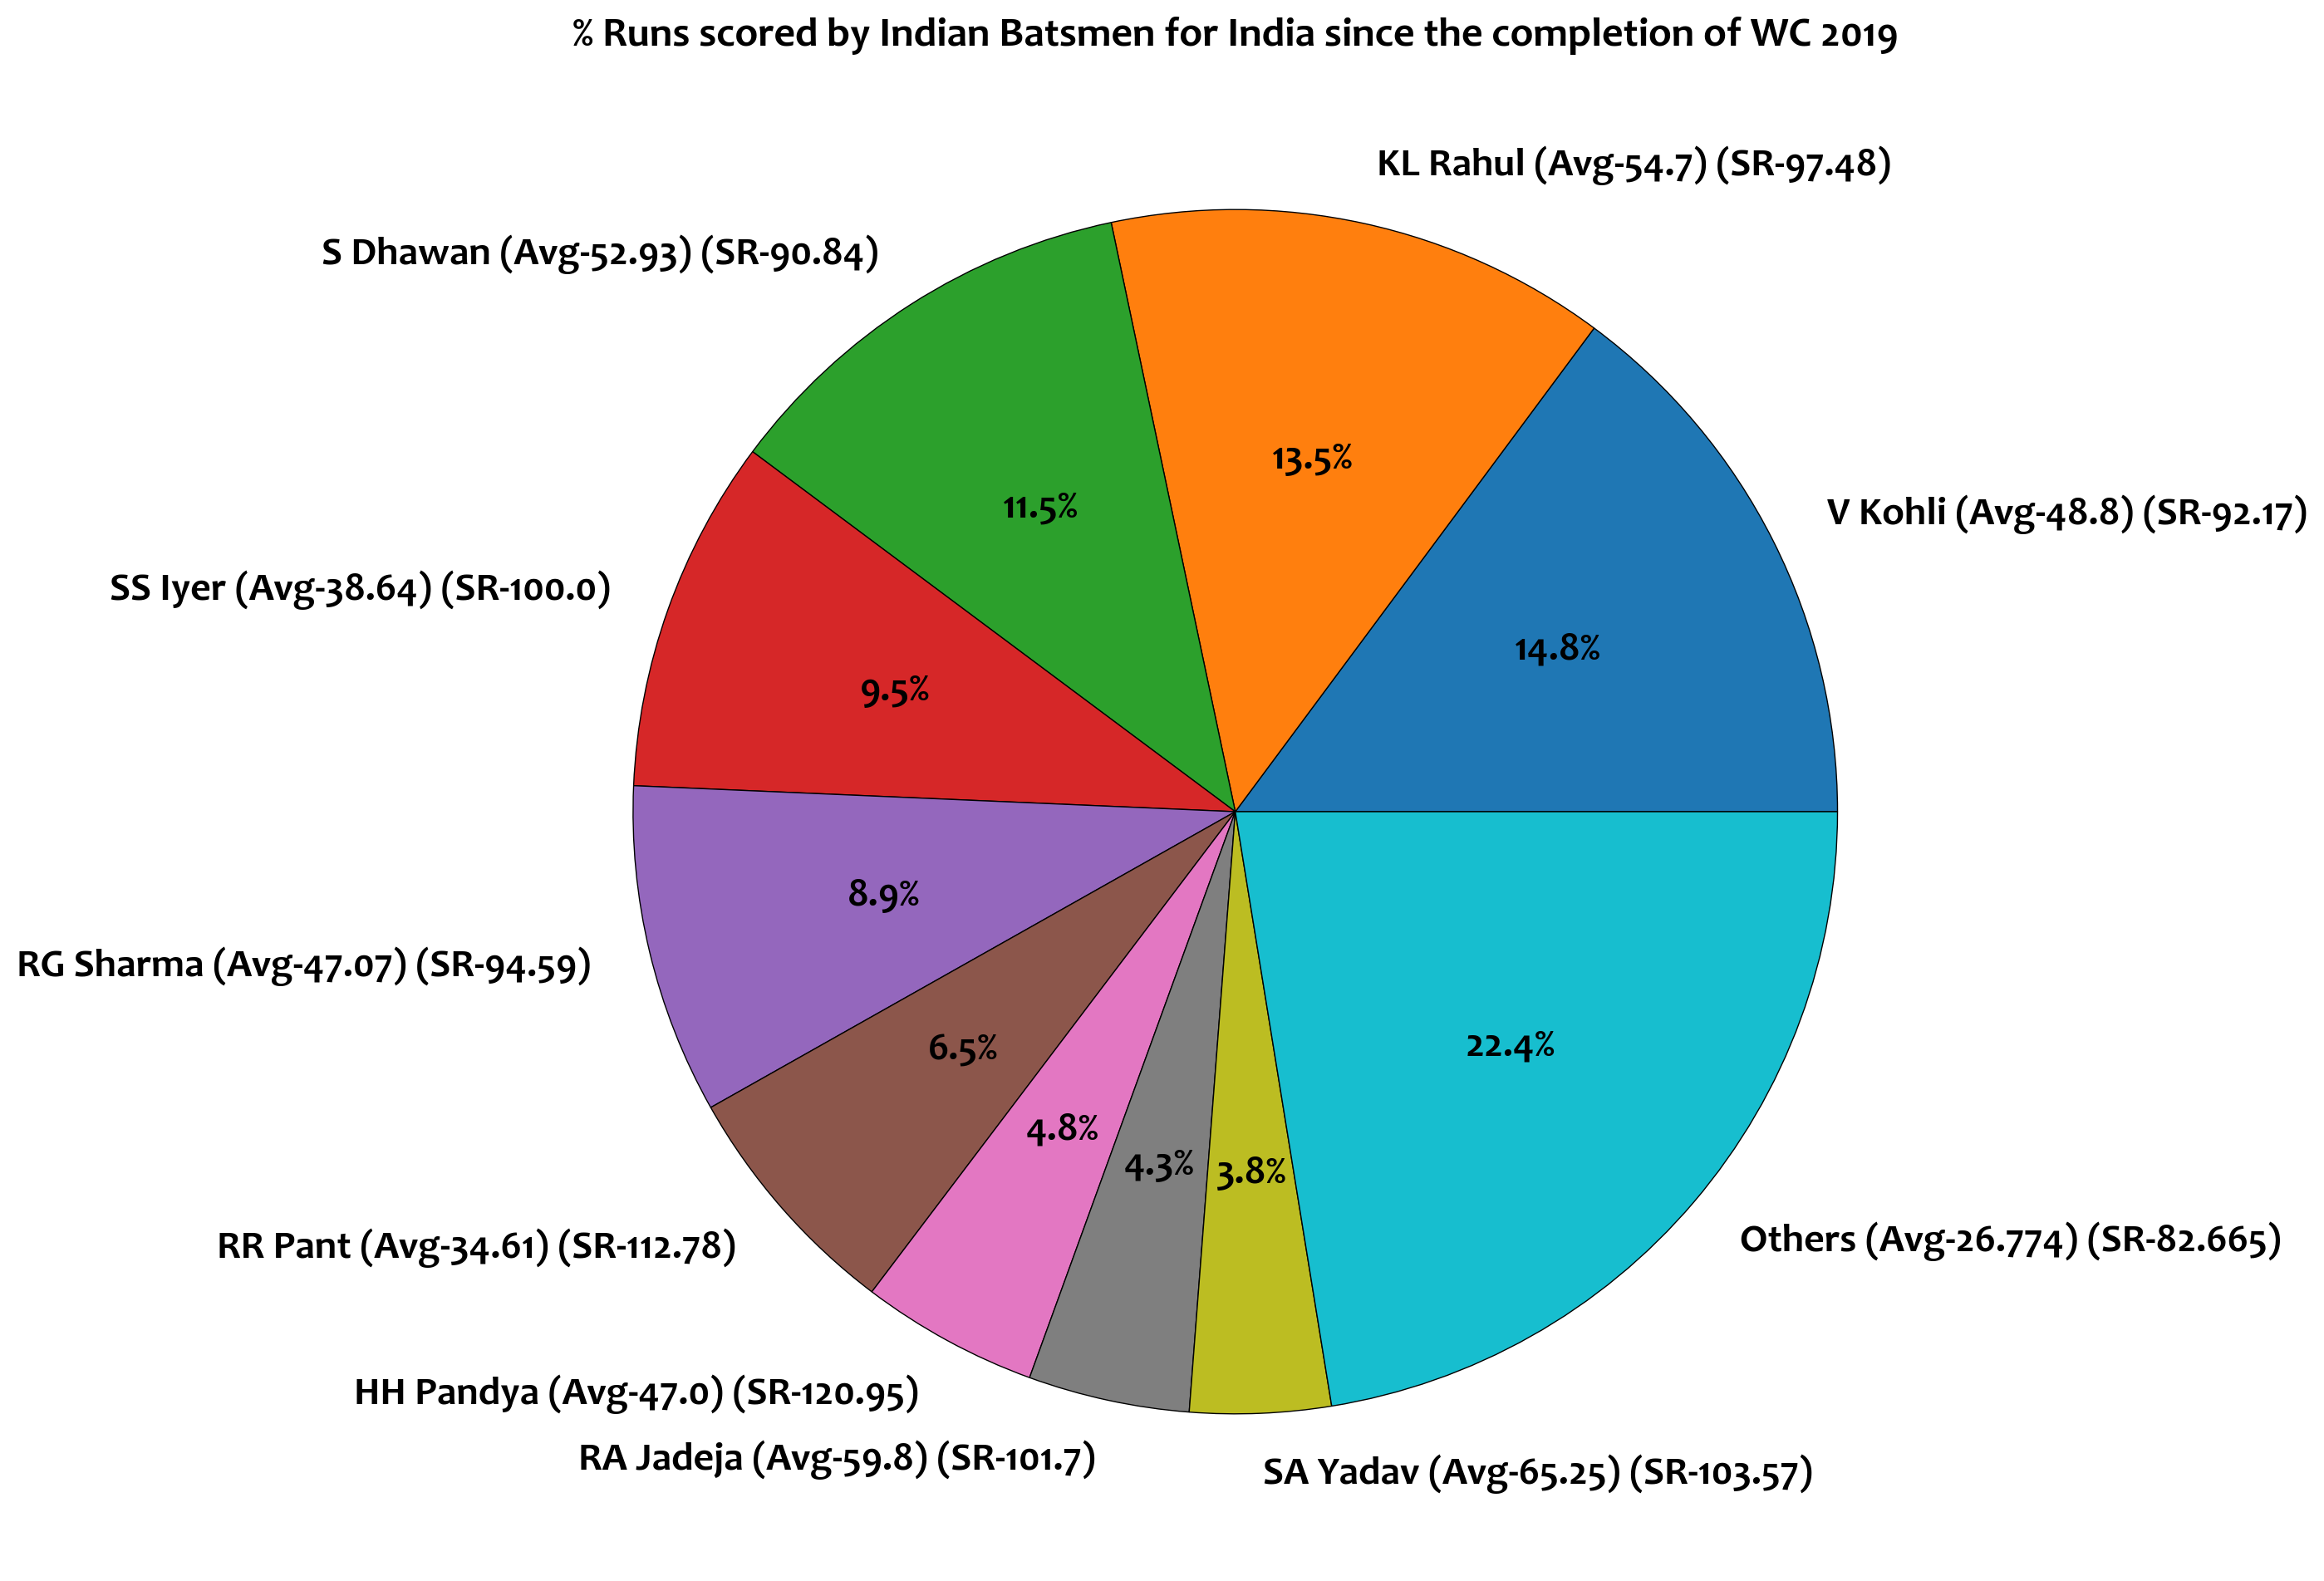

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_dpi(200)
fig.set_facecolor('white')
ax.pie(d1['Runs'], labels=d1['Player'] + '(Avg-' + d1['Ave'].astype(str) + ')' + ' (SR-' + d1['SR'].astype(str) + ')', autopct='%1.1f%%',
       wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
ax.set_title('% Runs scored by Indian Batsmen for India since the completion of WC 2019', fontsize=18)
plt.show()

In [10]:
bowling_data = pd.read_csv('../data/odi_bowling_data_after_wc.csv')
bowling_data = bowling_data.drop(columns=['Unnamed: 0', 'Unnamed: 14', 'BBI'])
bowling_data.dropna(inplace=True)
bowling_data.replace('-', '0', inplace=True)
bowling_data.iloc[:, 2:] = bowling_data.iloc[:, 2:].astype(float)
bowling_data.iloc[:, 2:4] = bowling_data.iloc[:, 2:4].astype(int)
bowling_data.iloc[:, 5:8] = bowling_data.iloc[:, 5:8].astype(int)
bowling_data.iloc[:, 11:] = bowling_data.iloc[:, 11:].astype(int)
bowling_data = bowling_data[bowling_data['Ave'].astype(float)>0]
bowling_data

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4,5
0,AS Joseph (WI),2019-2022,26,26,228.1,11,1099,44,24.97,4.81,31.1,3,0
1,Bilal Khan (OMA),2019-2022,22,22,180.3,14,841,39,21.56,4.65,27.7,2,0
2,Zeeshan Maqsood (OMA),2019-2022,23,23,189.5,15,755,36,20.97,3.97,31.6,2,0
3,AR McBrine (IRE),2020-2022,23,21,180.0,14,787,32,24.59,4.37,33.7,2,1
4,A Zampa (AUS),2020-2021,16,16,150.2,3,752,32,23.50,5.00,28.1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,RE van der Merwe (NED),2021-2021,1,1,6.0,0,27,1,27.00,4.50,36.0,0,0
281,JM Vince (ENG),2020-2021,6,2,7.0,0,38,1,38.00,5.42,42.0,0,0
282,Waheed Ahmed (UAE),2019-2021,7,6,20.0,0,94,1,94.00,4.70,120.0,0,0
283,SG Whittingham (SCOT),2019-2019,1,1,8.0,0,50,1,50.00,6.25,48.0,0,0


In [11]:
d = bowling_data[bowling_data['Player'].str.contains('IND')]
d = d[d['Runs'] > 0]
d

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4,5
18,Mohammed Shami (INDIA),2019-2020,12,12,100.2,4,649,21,30.90,6.46,28.6,1,0
22,YS Chahal (INDIA),2019-2022,12,12,114.5,2,640,20,32.00,5.57,34.4,1,0
27,SN Thakur (INDIA),2019-2022,14,14,115.4,4,786,19,41.36,6.79,36.5,1,0
49,M Prasidh Krishna (INDIA),2021-2022,6,6,54.0,4,274,15,18.26,5.07,21.6,2,0
53,Kuldeep Yadav (INDIA),2019-2021,14,14,130.0,1,804,14,57.42,6.18,55.7,0,0
61,B Kumar (INDIA),2019-2022,10,10,83.0,2,473,13,36.38,5.69,38.3,1,0
65,RA Jadeja (INDIA),2019-2020,15,15,128.0,1,705,12,58.75,5.50,64.0,0,0
79,JJ Bumrah (INDIA),2020-2022,12,12,115.4,4,619,10,61.90,5.35,69.4,0,0
103,DL Chahar (INDIA),2019-2022,5,5,40.0,3,235,7,33.57,5.87,34.2,0,0
131,NA Saini (INDIA),2019-2021,8,8,70.0,0,481,6,80.16,6.87,70.0,0,0


In [12]:
d = d[['Player', 'Wkts', 'Ave', 'Econ', 'SR']]
d1 = d.iloc[:9, :]
d2 = d.iloc[9:, :]
d1.loc[len(d1.index)] = ['Others ', d2.Wkts.sum(), round(d2.Ave.mean(), 3), round(d2.Econ.mean(), 3), round(d2.SR.mean(), 3)]
d1['Player'] = d1['Player'].str.replace('\(INDIA\)', '')
d1

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Player,Wkts,Ave,Econ,SR
18,Mohammed Shami,21,30.900,6.460,28.600
22,YS Chahal,20,32.000,5.570,34.400
27,SN Thakur,19,41.360,6.790,36.500
49,M Prasidh Krishna,15,18.260,5.070,21.600
53,Kuldeep Yadav,14,57.420,6.180,55.700
61,B Kumar,13,36.380,5.690,38.300
65,RA Jadeja,12,58.750,5.500,64.000
79,JJ Bumrah,10,61.900,5.350,69.400
103,DL Chahar,7,33.570,5.870,34.200
9,Others,32,50.242,5.777,50.958


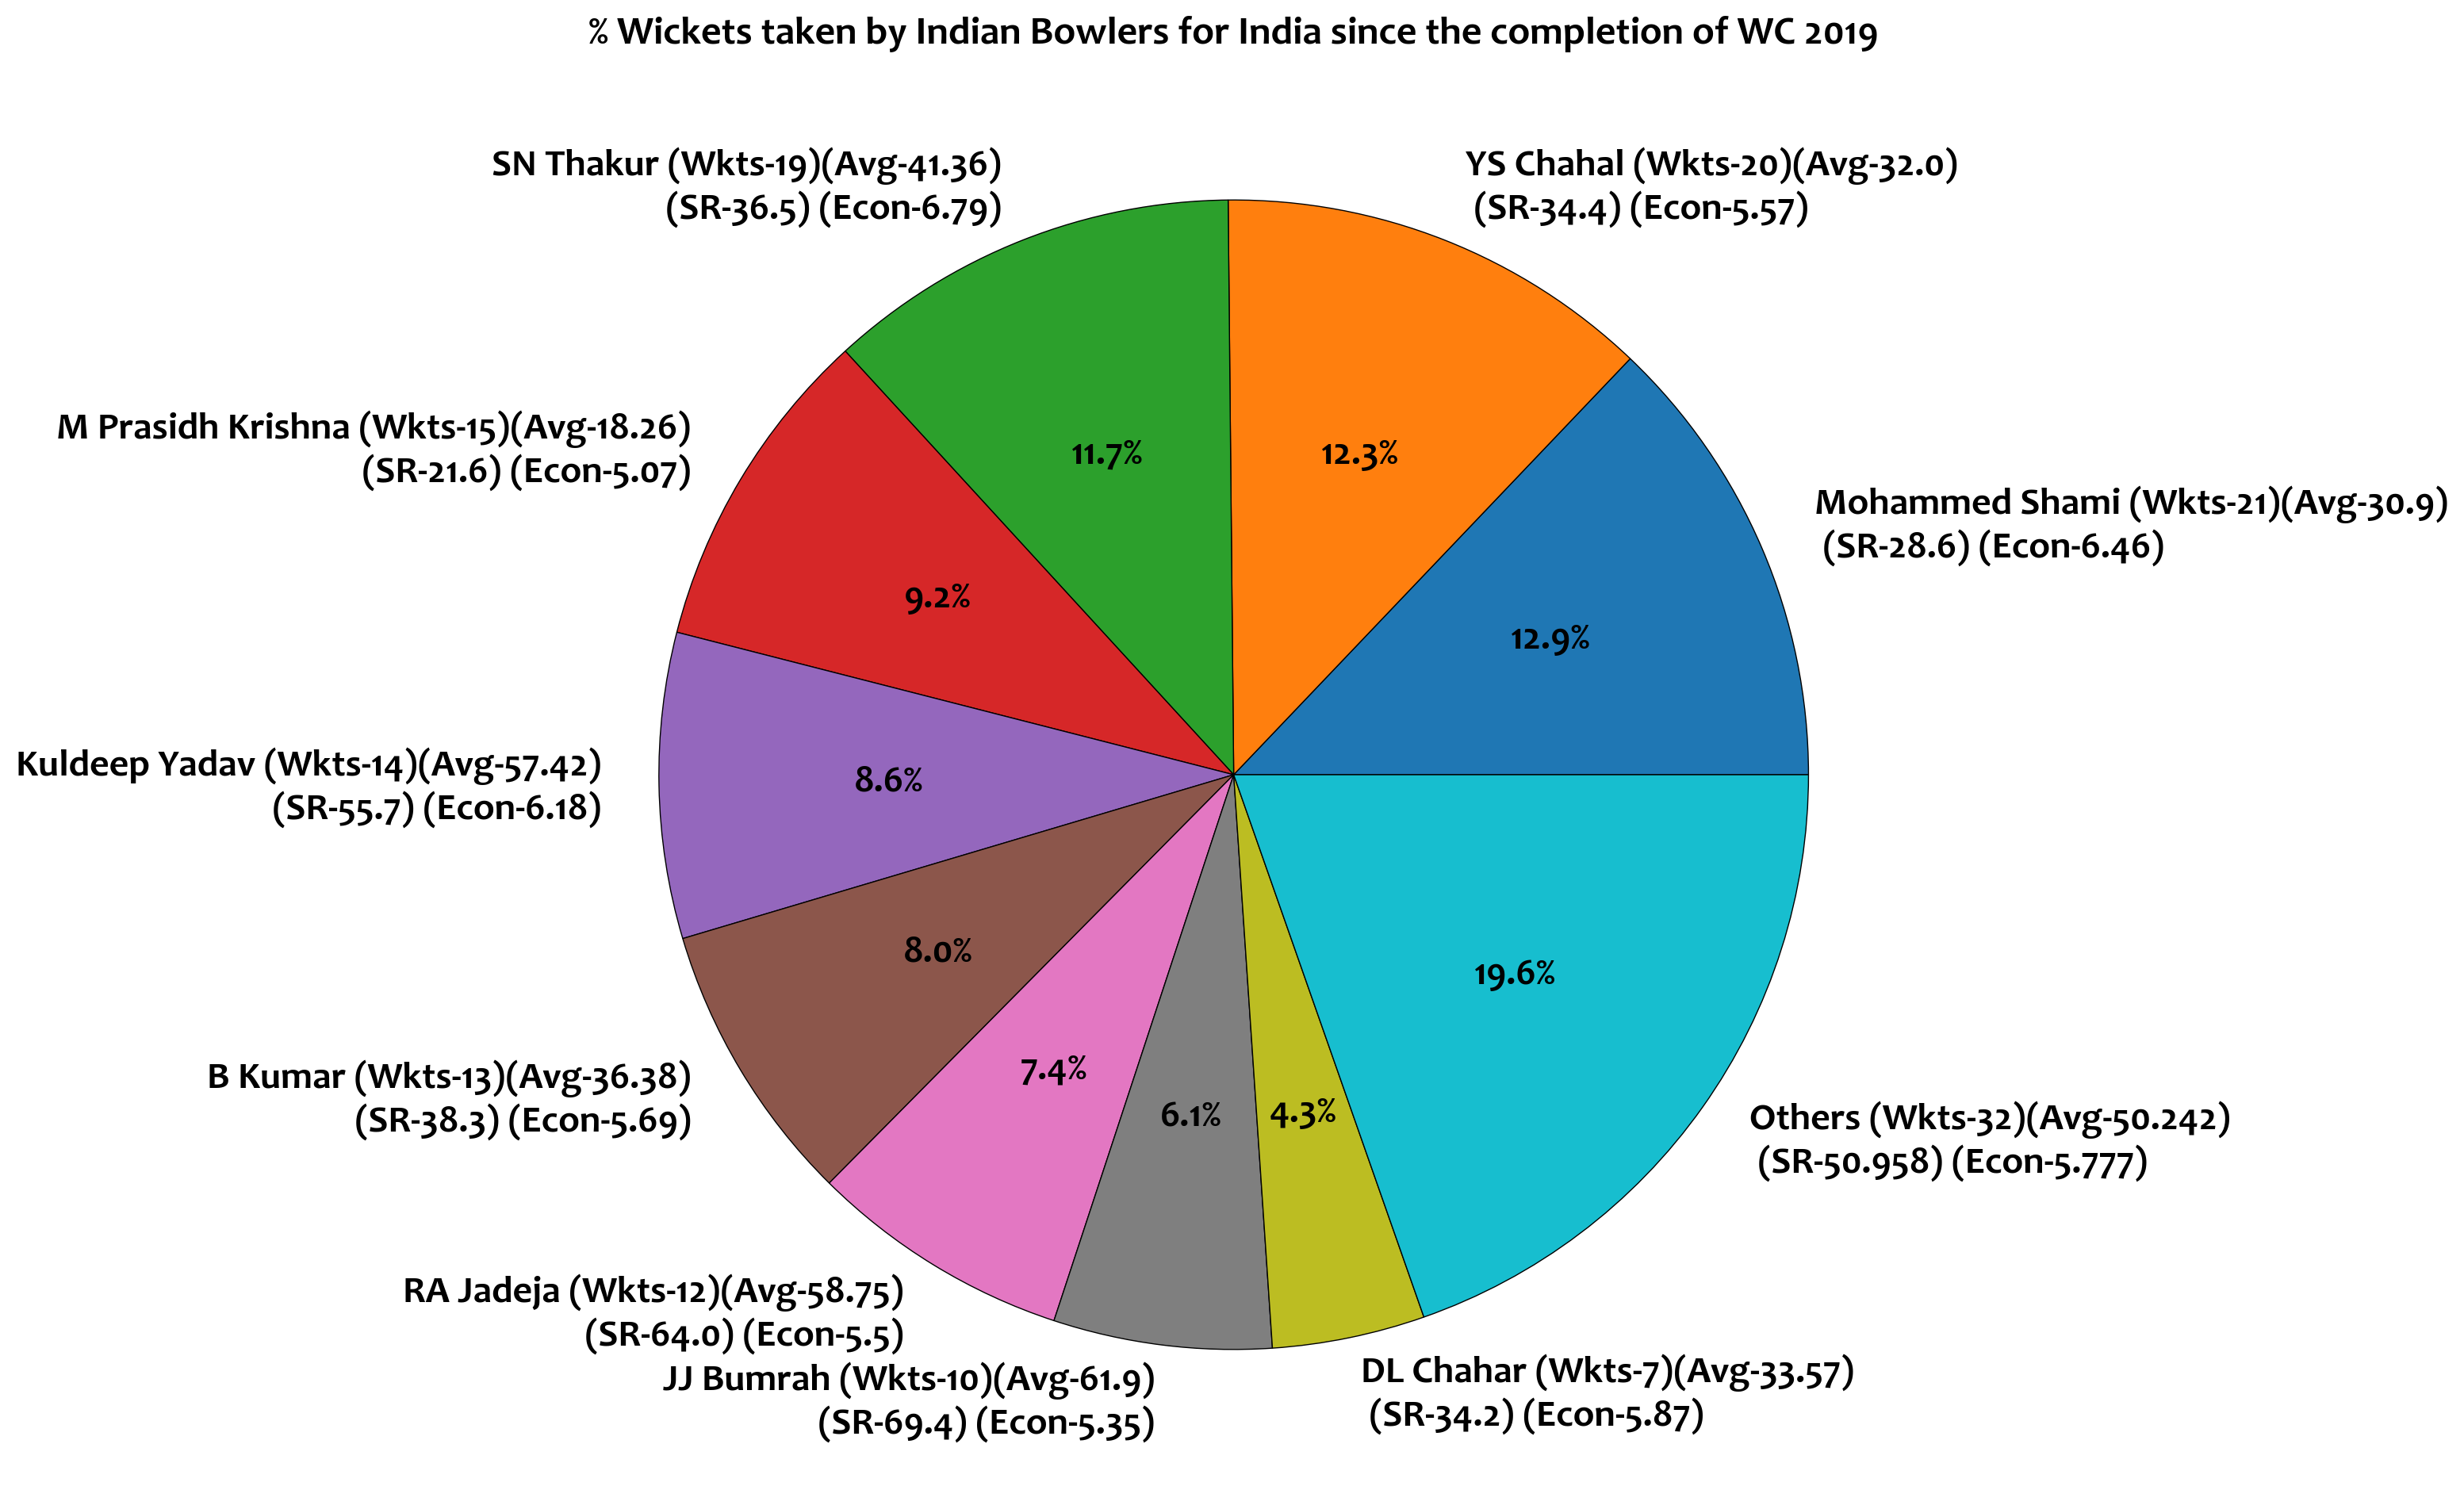

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_dpi(200)
fig.set_facecolor('white')
ax.pie(d1['Wkts'], labels=d1['Player'] + '(Wkts-' + d1['Wkts'].astype(str) + ')' + '(Avg-' + d1['Ave'].astype(str) + ')' + 
       '\n (SR-' + d1['SR'].astype(str) + ')' + ' (Econ-' + d1['Econ'].astype(str) + ')', 
       autopct='%1.1f%%',
       wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
ax.set_title('% Wickets taken by Indian Bowlers for India since the completion of WC 2019', fontsize=18)
plt.show()